In [1]:
import pandas as pd
import itertools
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLarsCV
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# Suppress warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('final_converted_out.csv')
df.head()

,manufacturer,device,has_jack,has_loudspeaker,has_stereo,has_dual,average_dollar_price,Launch_year,IsAvailable,Battery_Capacity,...,display_screen_body_ratio,display_width_px,display_height_px,display_density,platform_os,platform_cpu_count,platform_cpu_speed_ghz,memory_internal_storage,memory_ram,main_camera_single_mp
0,acer,acer_iconia_talk_s,1,1,0,0,181.9,2016,1,3400,...,69.8,720,1280,210,android,4.0,1.3,32.0,2.0,13.0
1,acer,acer_liquid_z6_plus,1,1,0,0,267.5,2016,1,4080,...,71.7,1080,1920,401,android,8.0,1.3,32.0,3.0,13.0
2,acer,acer_liquid_x2,1,1,0,0,246.1,2015,1,4020,...,69.0,720,1280,267,android,8.0,1.3,32.0,3.0,13.0
3,acer,acer_iconia_tab_a500,1,1,1,0,214.0,2011,1,3260,...,64.3,800,1280,149,android,2.0,1.0,32.0,1.0,5.0
4,acer,acer_liquid_jade_primo,1,1,0,0,235.4,2015,1,2870,...,70.2,1080,1920,401,microsoft,6.0,1.8,32.0,3.0,21.0


## Doing one-hot encoding on categorical columns

In [3]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)
df_encoded.head()

['manufacturer', 'device', 'display_tech', 'platform_os']


,has_jack,has_loudspeaker,has_stereo,has_dual,average_dollar_price,Launch_year,IsAvailable,Battery_Capacity,Battery_Removability,Body_length_mm,...,platform_os_blackberry,platform_os_customized,platform_os_harmony,platform_os_hp,platform_os_ios,platform_os_ipados,platform_os_kaios,platform_os_microsoft,platform_os_sailfish,platform_os_sonim
0,1,1,0,0,181.9,2016,1,3400,0,191.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,0,267.5,2016,1,4080,0,153.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,0,0,246.1,2015,1,4020,1,153.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,1,0,214.0,2011,1,3260,0,260.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0,0,235.4,2015,1,2870,0,156.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
X = df_encoded.drop('average_dollar_price', axis=1)
y = df_encoded['average_dollar_price']
print(X.shape)
print(y.shape)

original_features = df_encoded.columns.tolist()
original_features.remove("average_dollar_price")

(719, 875)
(719,)


## Imputing NaNs and standardizing

In [5]:
# imputing missing values with mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
X = pd.DataFrame(imp.transform(X), columns = X.columns)

# standardizing values
x_scaler = StandardScaler()
X = pd.DataFrame(x_scaler.fit_transform(X), columns= X.columns)
y_scaler = StandardScaler()
y = y.values.reshape(-1,1)
y = y_scaler.fit_transform(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.20, shuffle=True)

print(X_train.shape)
print(y_train.shape)
print(X_train.columns)

(575, 875)
(575, 1)
Index(['has_jack', 'has_loudspeaker', 'has_stereo', 'has_dual', 'Launch_year',
       'IsAvailable', 'Battery_Capacity', 'Battery_Removability',
       'Body_length_mm', 'Body_width_mm',
       ...
       'platform_os_blackberry', 'platform_os_customized',
       'platform_os_harmony', 'platform_os_hp', 'platform_os_ios',
       'platform_os_ipados', 'platform_os_kaios', 'platform_os_microsoft',
       'platform_os_sailfish', 'platform_os_sonim'],
      dtype='object', length=875)


### Checking out individual features that seem intuitively significant


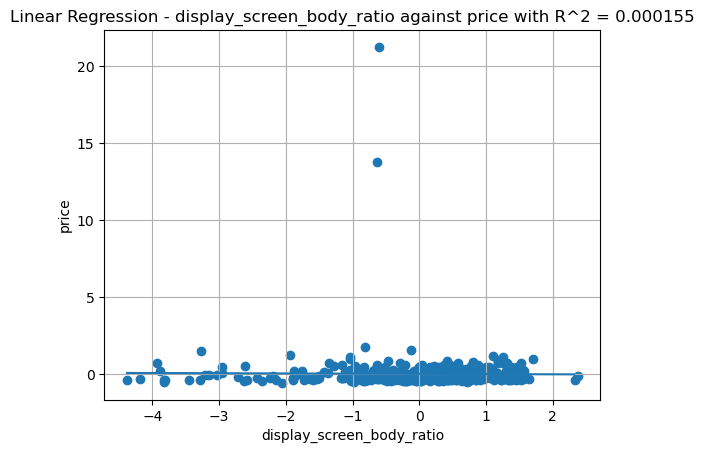

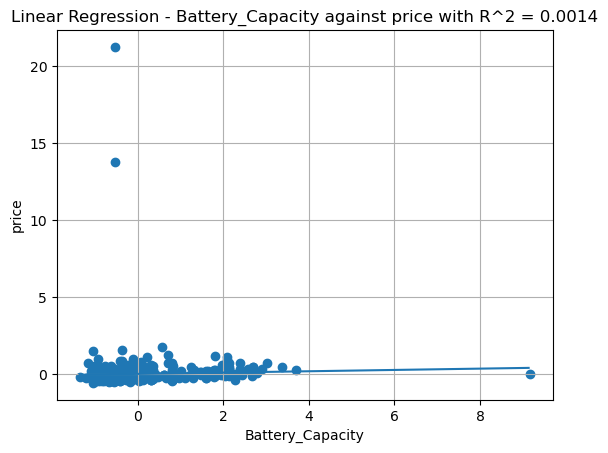

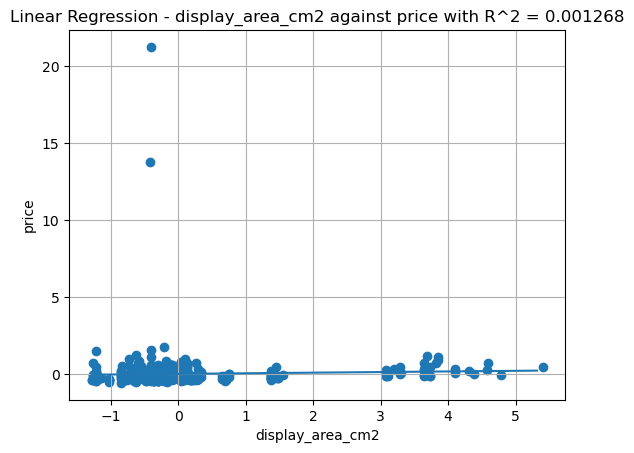

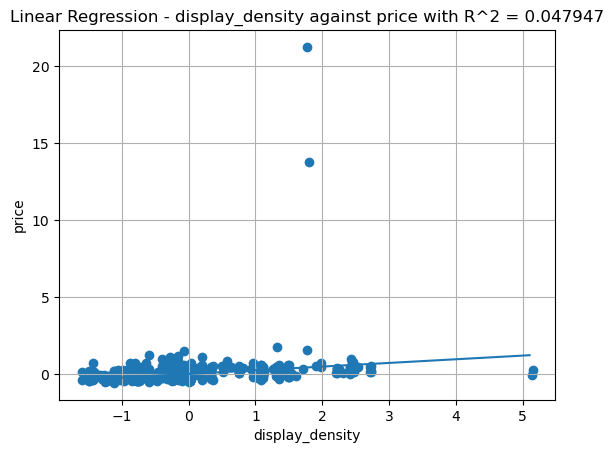

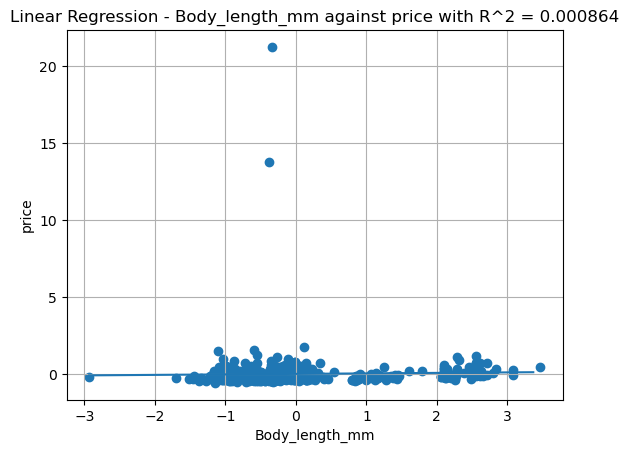

In [7]:
for feature in ["display_screen_body_ratio", "Battery_Capacity", "display_area_cm2","display_density","Body_length_mm"]:
    X_train_feature = X_train[feature].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X_train_feature, y_train)
    r2 = r2_score(y_train, model.predict(X_train_feature))
    
    # plot
    x_grid = np.arange(X_train_feature.min(), X_train_feature.max(), 0.1).reshape(-1, 1)
    y_grid = model.predict(x_grid)
    plt.scatter(X_train_feature, y_train)
    plt.plot(x_grid, y_grid)
    
    # Label the plot and display R-squared score
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(f'Linear Regression - {feature} against price with R^2 = {round(r2,6)}')
    plt.grid(True)
    plt.show()	

## Taking a look at PCA for top 10 features

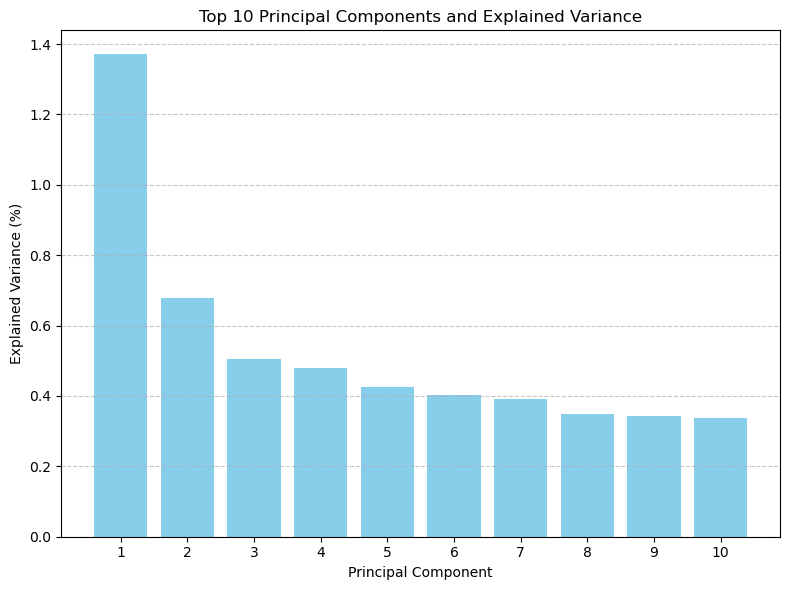

Top 10 Features and Explained Variance:
Feature 1 (Index: 0): 0.013706%
Feature 2 (Index: 1): 0.006775%
Feature 3 (Index: 2): 0.005059%
Feature 4 (Index: 3): 0.004784%
Feature 5 (Index: 4): 0.004246%
Feature 6 (Index: 5): 0.004028%
Feature 7 (Index: 6): 0.003906%
Feature 8 (Index: 7): 0.003499%
Feature 9 (Index: 8): 0.003422%
Feature 10 (Index: 9): 0.003366%


In [8]:
# Perform PCA with 5 components
pca = PCA(n_components=10)
pca_data = pca.fit_transform(X)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Get top 2 features with highest explained variance
top_features = np.argsort(explained_variance)[::-1][:20]
top_variance = explained_variance[top_features]

# Visualize explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, 11), top_variance * 100, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Top 10 Principal Components and Explained Variance')
plt.xticks(range(1, 11))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print top 5 features and explained variance
print("Top 10 Features and Explained Variance:")
for i, (feature, variance) in enumerate(zip(top_features, top_variance)):
    print(f"Feature {i+1} (Index: {feature}): {variance:.6f}%")



### This is not good since explained variance is extremely low; even the top 10 features wont be good linear predictors

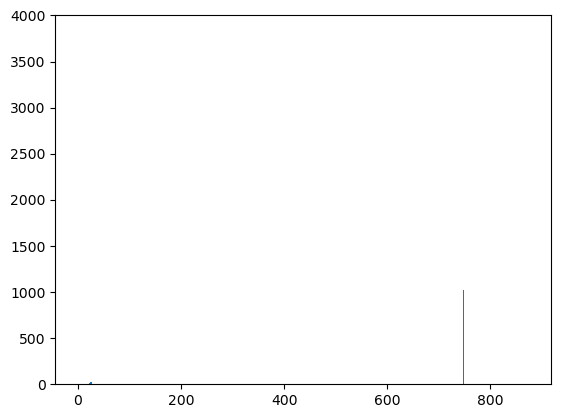

In [9]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [10]:
# doing linear regression on 1 features, finding best single feature

subset = set(itertools.combinations(X, 1))
top_20 = {}
for i in range(20):
    best_score = -np.Inf
    best_feature = []
    for feats in subset:
      this_X = X_train[list(feats)]
      cvs = cross_val_score(linear_model.LinearRegression(), 
                                 this_X, y_train, cv=5, scoring='r2')
      this_score = cvs.mean()
      if this_score > best_score:
        best_score = this_score
        best_feature = feats
    
    # report
    print('Best R2: ', best_score)
    print('Best Features: ', best_feature)
    top_20[best_feature] = best_score
    subset.discard(best_feature)

for k, v in top_20.items():
    print(f"feature {k} scores: {v}")

Best R2:  0.2999947678031738
Best Features:  ('manufacturer_vertu',)
Best R2:  0.2999947678031738
Best Features:  ('display_tech_sapphire crystal glass',)
Best R2:  0.13424825829842607
Best Features:  ('device_vertu_signature_touch',)
Best R2:  0.09455312188110368
Best Features:  ('display_height_px',)
Best R2:  0.08965007086710433
Best Features:  ('display_width_px',)
Best R2:  0.04836077301382591
Best Features:  ('display_density',)
Best R2:  0.03882936140436668
Best Features:  ('main_camera_single_mp',)
Best R2:  0.02614741741398996
Best Features:  ('memory_ram',)
Best R2:  0.02409269078155618
Best Features:  ('memory_internal_storage',)
Best R2:  0.013048761826888921
Best Features:  ('Battery_Removability',)
Best R2:  0.008788652509563044
Best Features:  ('has_jack',)
Best R2:  -5.490441322406614e-05
Best Features:  ('has_stereo',)
Best R2:  -0.0004545080872493834
Best Features:  ('platform_cpu_count',)
Best R2:  -0.005788824426510297
Best Features:  ('platform_os_ipados',)
Best R2

In [11]:
feature_dict = {}

def getFeatureWeights(f, w):
  for idx in range(len(f)-1):
    feature_dict[f[idx]]= w[idx]


l2 = linear_model.Ridge(alpha=0.5).fit(X_train, y_train)

getFeatureWeights(original_features, l2.coef_[0])
sorted_keys = sorted(feature_dict, key=feature_dict.get, reverse=True)
for r in sorted_keys:
    print(r, feature_dict[r])


device_vertu_signature_touch 0.35119276169891445
manufacturer_vertu 0.3006173813775615
display_tech_sapphire crystal glass 0.3006173813775615
device_vertu_aster 0.07364825644419805
device_blackberry_porsche_design_p_9981 0.056473170993495
device_cat_s61 0.05416751959733007
device_panasonic_lumix_smart_camera_cm1 0.05112969166413797
display_density 0.04517617597602632
device_sonim_xp7 0.03793214516309357
platform_cpu_speed_ghz 0.0327948299858567
has_stereo 0.03250486518757198
device_google_pixel_tablet 0.031044165184501666
display_height_px 0.030715051507566125
display_width_px 0.02903654974867665
manufacturer_cat 0.02732647198736982
device_gionee_w909 0.02713879570871864
device_toshiba_windows_phone_is12t 0.026870814204035545
manufacturer_sonim 0.023130782061307323
device_energizer_hardcase_h550s 0.022520578821741057
device_acer_iconia_tab_a501 0.021263604493853845
manufacturer_toshiba 0.020848288951027444
main_camera_single_mp 0.020751607959562754
device_lenovo_tab_p11_5g 0.0191871755

0.002445864764192898


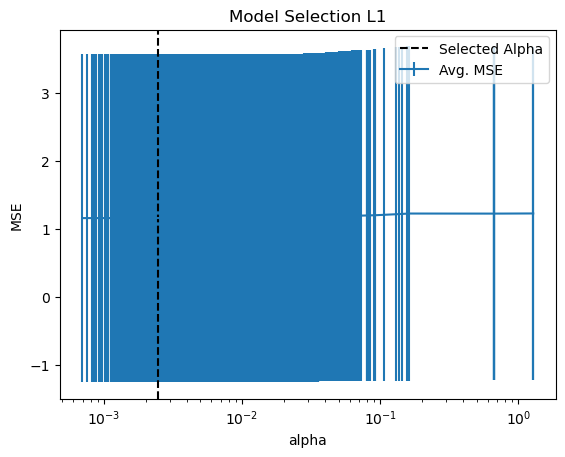

In [12]:
from sklearn.linear_model import LassoLarsCV, LassoCV

l1 = LassoLarsCV(cv=10, normalize=False).fit(X_train, y_train)

# compute stats
# get mean mse for each fold
mean_mse = l1.mse_path_.mean(axis=-1)
# get standard error of mse for each fold
std_mse = l1.mse_path_.std(axis=-1)
# get best alpha
best_alpha_l1 = l1.alpha_
print(best_alpha_l1)
# plot stuff
plt.errorbar(l1.cv_alphas_, mean_mse, yerr=std_mse, label='Avg. MSE')
plt.axvline(best_alpha_l1, linestyle='--', color="k", label="Selected Alpha")
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Model Selection L1')
plt.legend()
plt.show()

Best Alpha:  0.1


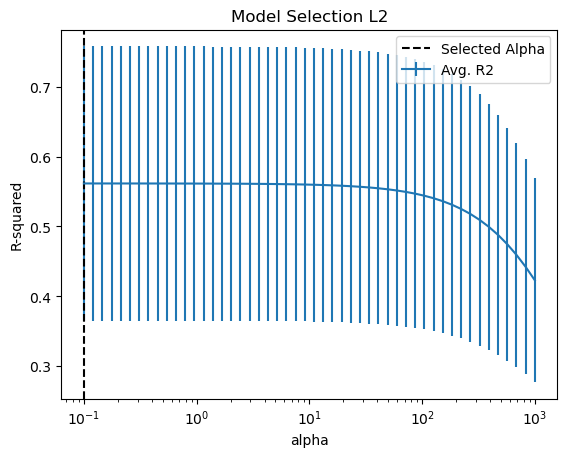

In [13]:
alphas = np.logspace(-1, 3, num=50)
cv = 5

# do cross-validation
scores = np.zeros((len(alphas), cv))
for idx in range(len(alphas)):
  l2 = linear_model.Ridge(alpha=alphas[idx])
  scores[idx,:] = cross_val_score(l2, X_train, y_train, cv=cv, scoring='r2')

# select best alpha
mean_r2 = np.mean(scores, axis=1)
std_r2 = np.std(scores, axis=1)
alpha_idx = np.argmax(mean_r2)
best_alpha_l2 = alphas[alpha_idx]
print('Best Alpha: ', best_alpha_l2)
  
# plot
plt.errorbar(alphas, mean_r2, yerr=std_r2, label='Avg. R2')
plt.axvline(best_alpha_l2, linestyle='--', color="k", label="Selected Alpha")
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R-squared')
plt.title('Model Selection L2')
plt.legend()
plt.show()

## Sorting feature weights found during L2 regularized fitting

In [14]:
feature_dict = {}

def getFeatureWeights(f, w):
  for idx in range(len(f)-1):
    feature_dict[f[idx]]= w[idx]

l2 = linear_model.Ridge(alpha=0.1).fit(X_train, y_train)
getFeatureWeights(original_features, l2.coef_[0])
sorted_keys = sorted(feature_dict, key=feature_dict.get, reverse=True)
for r in sorted_keys:
    print(r, feature_dict[r])

device_vertu_signature_touch 0.3513082882912034
manufacturer_vertu 0.30067229430028375
display_tech_sapphire crystal glass 0.30067229430028375
device_vertu_aster 0.07361033435332452
device_blackberry_porsche_design_p_9981 0.05650404400817646
device_cat_s61 0.05419442109598141
device_panasonic_lumix_smart_camera_cm1 0.05115710885670175
display_density 0.04518207046308316
device_sonim_xp7 0.03794959129094105
platform_cpu_speed_ghz 0.03279823361025072
has_stereo 0.03250732495191426
device_google_pixel_tablet 0.03106006181065108
display_height_px 0.03071928182262299
display_width_px 0.029039367416964605
manufacturer_cat 0.027335203676397565
device_gionee_w909 0.027152617248358026
device_toshiba_windows_phone_is12t 0.026881980685202506
manufacturer_sonim 0.023139033427601555
device_energizer_hardcase_h550s 0.02253259820056636
device_acer_iconia_tab_a501 0.021273994927548293
manufacturer_toshiba 0.02085524734502531
main_camera_single_mp 0.020755015904656244
device_lenovo_tab_p11_5g 0.0191970

## Evaluating baseline

In [15]:
constant_value = np.mean(y_train)

constant_predictions = np.full(len(X_test), constant_value)

# Calculate MSE for constant predictor
constant_mse = mean_squared_error(y_test, constant_predictions)

print('Constant MSE : ', constant_mse)

Constant MSE :  0.09631556118773336


## Evaluating linear model trained on subset of features

In [16]:
from sklearn.metrics import mean_squared_error

# selected from the list of feature weights found from the cell above
selected_best_features = ["display_density","has_stereo","display_width_px","display_height_px","platform_cpu_speed_ghz","main_camera_single_mp","memory_internal_storage"]

#train
best_subsets_best = linear_model.LinearRegression()
best_subsets_best.fit(X_train[selected_best_features],y_train)

#predict
best_subsets_predict =  best_subsets_best.predict(X_test[selected_best_features])

#mse
best_subsets_mse = mean_squared_error(y_test,best_subsets_predict)
print('Best Subsets MSE : ',best_subsets_mse)

Best Subsets MSE :  0.11785142823238452


## Evaluating linear model trained on full feature set

In [28]:
#train
best_subsets_best = linear_model.LinearRegression()
best_subsets_best.fit(X_train,y_train)

#predict
full_set_predict =  best_subsets_best.predict(X_test)

#mse
full_set_mse = mean_squared_error(y_test,best_subsets_predict)
print('Full set MSE : ',best_subsets_mse)

Full set MSE :  0.11785142823238452


## Evaluating L2 regularized model

In [18]:
l2_best = linear_model.Ridge(alpha=best_alpha_l2).fit(X_train, y_train)
l2_predict = l2_best.predict(X_test)
l2_mse = mean_squared_error(y_test, l2_predict)
print('L2 MSE : ',l2_mse)

L2 MSE :  0.04472532690824096


## Evaluating LASSO model

In [19]:
lasso_predict =  l1.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predict)
print('Lasso MSE : ',lasso_mse)

Lasso MSE :  0.03934618979619395


## Performing some predictions

In [41]:
for i in range(20):
    example_index = i
    predicted_value = l2.predict(X_test.iloc[example_index].values.reshape(1, -1))
    
    actual_value = y_test[example_index]
    predicted = y_scaler.inverse_transform(predicted_value)[0][0]
    baseline = y_scaler.inverse_transform([[constant_value]])[0][0]
    actual = y_scaler.inverse_transform([actual_value])[0][0]
    print(f"L2Predicted price: {predicted:.2f}; Baseline: {baseline:.2f}; Actual price: {actual:.2f}")


L2Predicted price: 172.25; Baseline: 245.49; Actual price: 128.40
L2Predicted price: 346.43; Baseline: 245.49; Actual price: 406.60
L2Predicted price: 162.06; Baseline: 245.49; Actual price: 128.40
L2Predicted price: 197.86; Baseline: 245.49; Actual price: 216.00
L2Predicted price: 244.69; Baseline: 245.49; Actual price: 214.00
L2Predicted price: 236.12; Baseline: 245.49; Actual price: 156.00
L2Predicted price: 186.04; Baseline: 245.49; Actual price: 342.40
L2Predicted price: 132.44; Baseline: 245.49; Actual price: 96.30
L2Predicted price: 190.29; Baseline: 245.49; Actual price: 139.10
L2Predicted price: 191.86; Baseline: 245.49; Actual price: 72.00
L2Predicted price: 270.87; Baseline: 245.49; Actual price: 363.80
L2Predicted price: 188.38; Baseline: 245.49; Actual price: 96.30
L2Predicted price: 187.87; Baseline: 245.49; Actual price: 117.70
L2Predicted price: 111.40; Baseline: 245.49; Actual price: 42.80
L2Predicted price: 175.81; Baseline: 245.49; Actual price: 139.10
L2Predicted pr